In [1]:
import numpy as np
from scipy.io import loadmat

import os

import matplotlib.pyplot as plt
import seaborn as sns
import vapeplot; vapeplot.set_palette('vaporwave')

In [2]:
data = loadmat('../../data/square/square_nearest_neighbors.mat')
xs = data['x']
labels = data['labels']


data = 'square'
policies = [
    'greedy',
    'round robin greedy'
]
linestyles = [
    '-',
    '--'
]
assert len(policies) == len(linestyles)

n_exps = 20
n_classes = 6
budget = 200

basepath = os.path.join('../../data/results', data)


queries = -1 * np.ones((len(policies), n_exps, budget), dtype=int)

for p_ind, policy in enumerate(policies):
    for i in range(n_exps):
        tmp_queries = np.loadtxt(
            os.path.join(basepath, policy, f'{policy}__queries__{i + 1}.csv'), 
            dtype=int
        ).flatten() - 1
        
        queries[p_ind, i, :] = tmp_queries
        
assert np.all(queries != -1)

In [3]:
queries

array([[[  0, 268, 177, ..., 381, 305, 340],
        [272, 285, 221, ..., 218, 247,  42],
        [146, 447, 212, ..., 298, 261, 335],
        ...,
        [440, 425, 332, ..., 388, 155, 478],
        [122, 183, 423, ..., 353, 187, 332],
        [446,  16, 189, ..., 436, 173, 196]],

       [[  0,  75,  98, ...,  84, 159,  69],
        [272, 205, 285, ...,  84, 238, 218],
        [146, 447,  63, ...,  84, 425,  42],
        ...,
        [440, 425, 332, ..., 403, 167,  25],
        [122, 165, 332, ..., 403, 439, 276],
        [446,  19, 192, ..., 146, 229, 248]]])

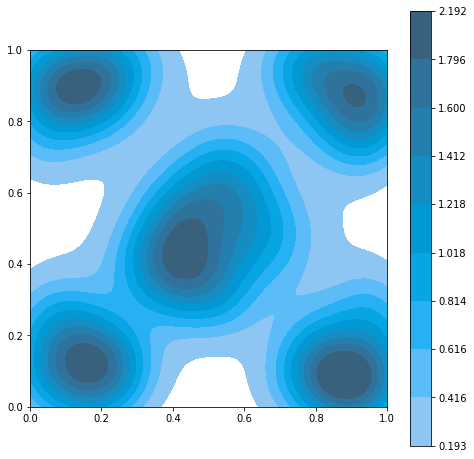

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.kdeplot(
    x=xs[queries[0], 0].flatten(), 
    y=xs[queries[0], 1].flatten(), 
    cbar=True, fill=True, ax=ax
)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_aspect('equal', 'box');

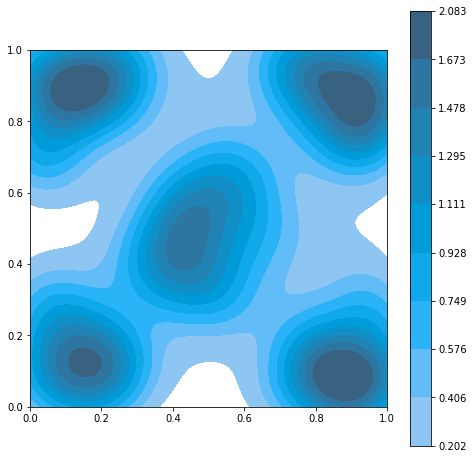

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.kdeplot(
    x=xs[queries[1], 0].flatten(), 
    y=xs[queries[1], 1].flatten(), 
    cbar=True, fill=True, ax=ax
)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_aspect('equal', 'box');